In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date

tickers = [
    "XLK", "XLF", "XLE", "XLV", "XLY", "XLP", "XLI", "XLC", "XLRE", "XLB", "XLU",# 11 GIC sectors
    "HYG", "LQD", "IEF", # Junk bonds/Investment Grade/ Treasury bonds
    "IVE", "IVW", # Value Investing and Growth Investing
    "IWM", "SPY", # Small Cap & Large Cap
    "EEM", "EFA", # Emerging Markets vs Developed Markets
    "GLD", "FXE", "UUP" # Gold, Foreign Currencies(EU), US Dollar
]

data = yf.download(tickers, start="2018-01-01", end=date.today())['Close'].pct_change()

phases = pd.DataFrame({
    "Phase": [
        "Reflation", "Deflation", "Reflation", "Stagflation", "Recovery"
    ],
    "Start": [
        "2018-01-01", "2020-02-01", "2021-01-01", "2022-07-01", "2024-01-01"
    ],
    "End": [
        "2020-01-31", "2020-12-31", "2022-06-30", "2023-12-31", date.today().strftime('%Y-%m-%d')
    ]
})

display(phases)

data["Cycle_Phase"] = "Unknown"

for i in range(len(phases)):
    dates = (data.index >= phases['Start'][i]) & (data.index <= phases["End"][i])
    data.loc[dates, "Cycle_Phase"] = phases["Phase"][i]

display(data)

/tmp/ipython-input-1867439990.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end=date.today())['Close'].pct_change()
[*********************100%***********************]  23 of 23 completed


,Phase,Start,End
0,Reflation,2018-01-01,2020-01-31
1,Deflation,2020-02-01,2020-12-31
2,Reflation,2021-01-01,2022-06-30
3,Stagflation,2022-07-01,2023-12-31
4,Recovery,2024-01-01,2025-10-17


Ticker,EEM,EFA,FXE,GLD,HYG,IEF,IVE,IVW,IWM,LQD,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Cycle_Phase
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reflation
2018-01-03,0.009582,0.004800,-0.004217,-0.002637,0.004808,0.001045,0.004093,0.008498,0.001039,0.001822,...,0.014977,0.005373,0.005386,0.008341,-0.000354,0.000305,-0.007856,0.009568,0.004592,Reflation
2018-01-04,0.004951,0.010960,0.005013,0.005127,0.001710,-0.000475,0.005377,0.003603,0.002661,-0.000331,...,0.006036,0.009263,0.007317,0.005055,0.002831,-0.017094,-0.008304,0.001421,0.003278,Reflation
2018-01-05,0.008622,0.005560,-0.002752,-0.001036,0.000682,-0.001234,0.003019,0.009357,0.002072,-0.000331,...,-0.000400,0.002824,0.006875,0.010517,0.004411,0.002174,-0.000389,0.008518,0.007923,Reflation
2018-01-08,0.000000,-0.000277,-0.006036,-0.000160,-0.000795,-0.000475,0.001548,0.002476,0.001550,-0.000083,...,0.006002,-0.001408,0.004123,0.003771,0.002459,0.006818,0.009351,-0.003636,0.001179,Reflation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-10,-0.036900,-0.018410,0.005065,0.010098,-0.005844,0.006230,-0.022115,-0.030886,-0.029943,0.002792,...,-0.028943,-0.021755,-0.022115,-0.040696,0.000769,-0.010941,-0.004085,-0.014425,-0.027506,Recovery
2025-10-13,0.029072,0.008023,-0.004106,0.024301,0.006254,0.000516,0.008839,0.020627,0.027840,0.003413,...,0.013612,0.009586,0.010407,0.024354,-0.003329,0.005654,0.007650,-0.001126,0.022339,Recovery
2025-10-14,-0.008980,0.004517,0.003280,0.007141,0.001119,0.002578,0.006510,-0.007538,0.014279,0.003312,...,-0.000116,0.011014,0.011752,-0.012834,0.016059,0.009533,0.008912,0.002747,0.002095,Recovery


In [ ]:
averages = data.groupby('Cycle_Phase').mean()

medians = data.groupby('Cycle_Phase').median()

#display(averages)
#display(medians)

In [ ]:
combined = pd.concat({'Average': averages.T, 'Median': medians.T}, axis=1)

# Reindex
combined = combined.reindex(tickers)

stats = pd.DataFrame()

# Iterate through each phase and add the corresponding Average and Median columns
    stats[(i, 'Average')] = combined[('Average', i)]
    stats[(i, 'Median')] = combined[('Median', i)]

#display(stats)
display((stats*100).round(3))

,"(Reflation, Average)","(Reflation, Median)","(Deflation, Average)","(Deflation, Median)","(Stagflation, Average)","(Stagflation, Median)","(Recovery, Average)","(Recovery, Median)"
Ticker,,,,,,,,
XLK,0.000553,0.000893,0.001736,0.003671,0.001248,0.001263,0.001022,0.001901
XLF,0.000297,0.000739,0.000482,0.000812,0.000625,0.000302,0.000827,0.001567
XLE,0.000667,0.000792,-0.000411,-0.003117,0.000719,0.000694,0.000260,0.001714
XLV,0.000440,0.001210,0.000853,-0.000141,0.000267,0.000231,0.000201,0.000326
XLY,0.000204,0.001411,0.001369,0.002124,0.000848,0.001186,0.000711,0.001276
XLP,0.000338,0.000571,0.000567,0.000797,0.000134,0.000656,0.000329,0.000515
XLI,0.000183,0.000917,0.000801,0.001848,0.000840,0.001492,0.000745,0.000606
XLC,-0.000062,0.000914,0.001241,0.001825,0.000922,0.000405,0.001110,0.001729
XLRE,0.000503,0.001273,0.000190,0.000541,0.000193,0.000000,0.000278,0.000633


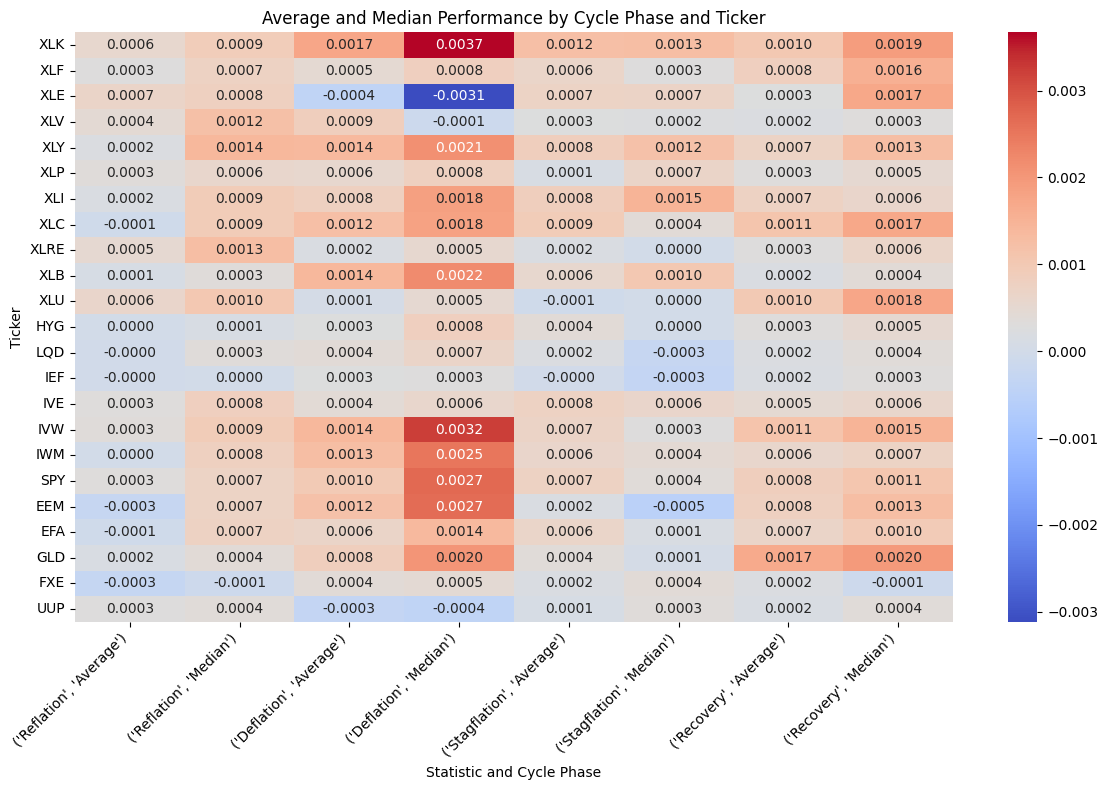

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(stats, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Average and Median Performance by Cycle Phase and Ticker')
plt.xlabel('Statistic and Cycle Phase')
plt.ylabel('Ticker')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()